# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


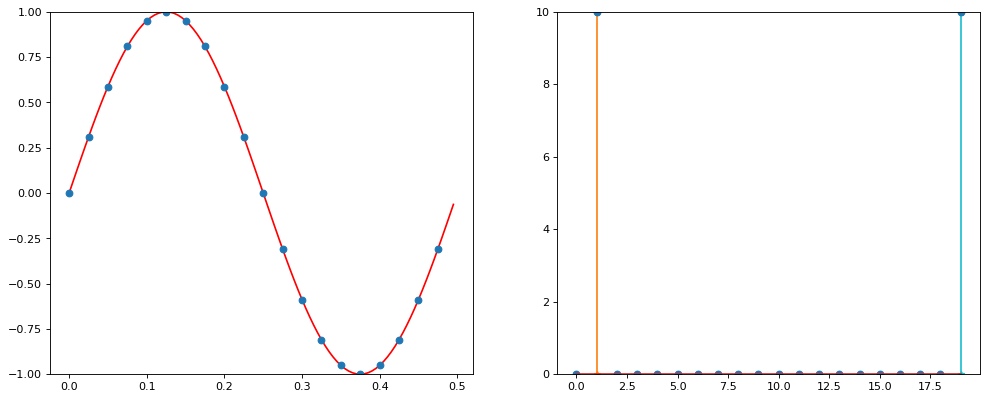

In [9]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# częstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [15]:
import numpy as np
def wykresy(A=1, LP=1, w=40, f=2.0, FUNC=None):
    %matplotlib inline

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    if FUNC is None:
        FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    xlabel('Time[s]')
    ylabel('Amplitude [j]')
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    
    signal1 = signal1 / len(signal) * 2
    # modul sygnalu

    # stare
    freqs = range(int(n))

    # Hertze
    freqs = np.arange(0, w, w / n)
#     freqs = np.linspace(0, w, n)

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    xlabel('Frequency [Hz]')
    ylabel('Amplitude [j]')
    
    angle(signal, deg=True)

    show()


UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


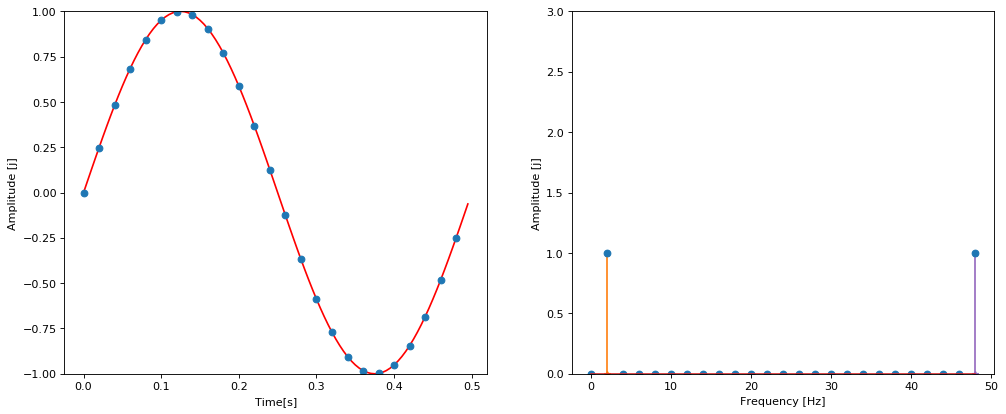

In [4]:
wykresy(w=50)# w=50

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


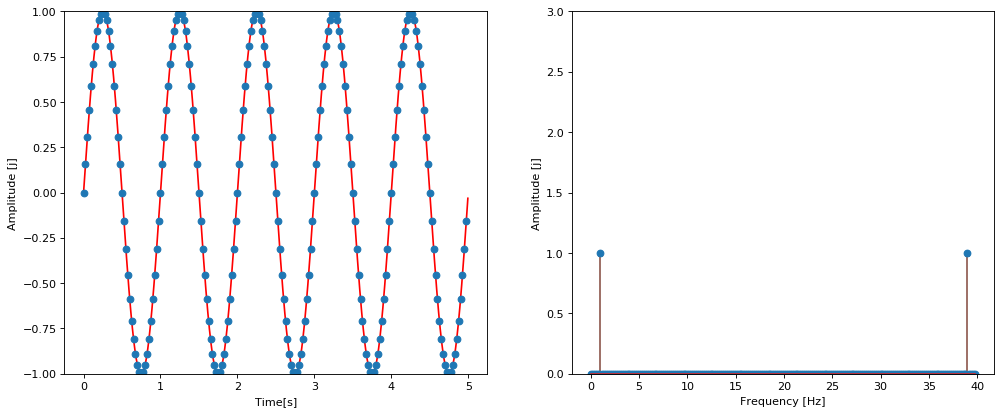

In [5]:
# popraw oś OX
wykresy(f=1.0, LP=5)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

Text(0, 0.5, 'Magnitude [dB]')

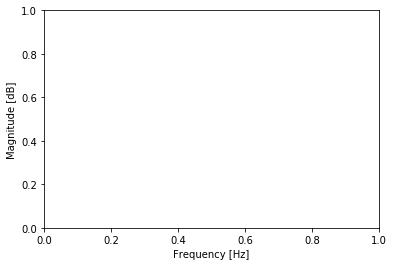

In [6]:
xlabel('Frequency [Hz]')
ylabel('Magnitude [dB]')

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

Wartość na osi OY się nie zmienia.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


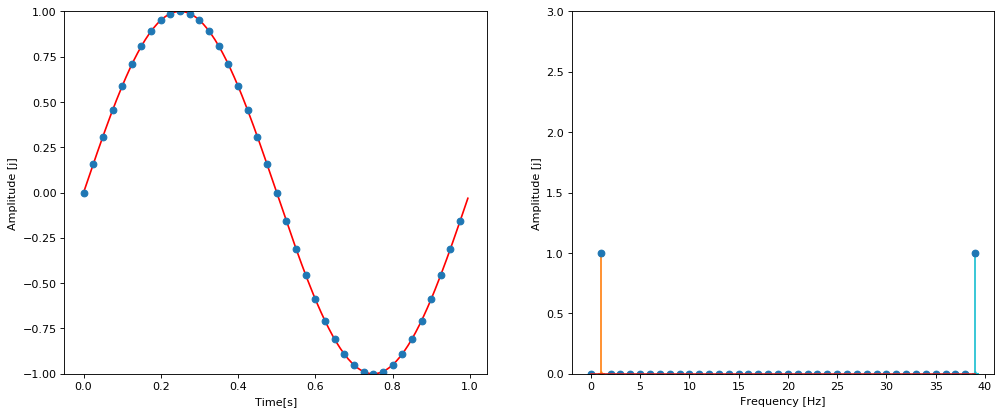

In [7]:
# f=1, A=1, LP=1
wykresy(f=1, A=1, LP=1)


/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


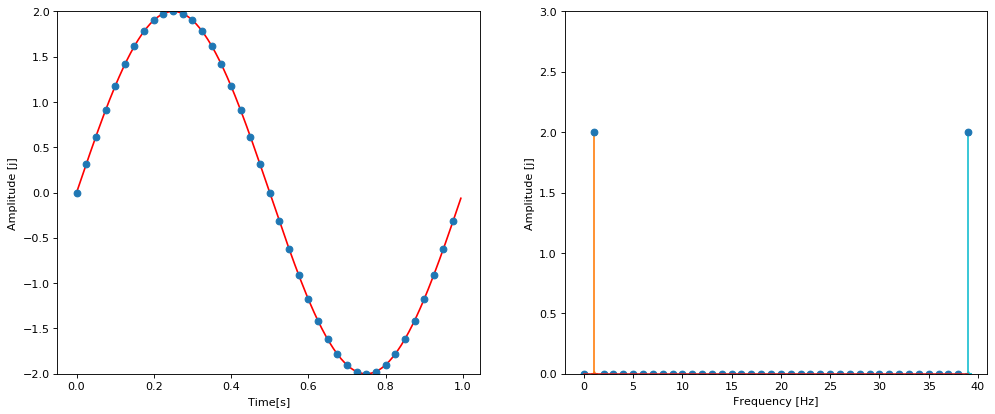

In [8]:
# f=1, A=2, LP=1
wykresy(f=1, A=2, LP=1)

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


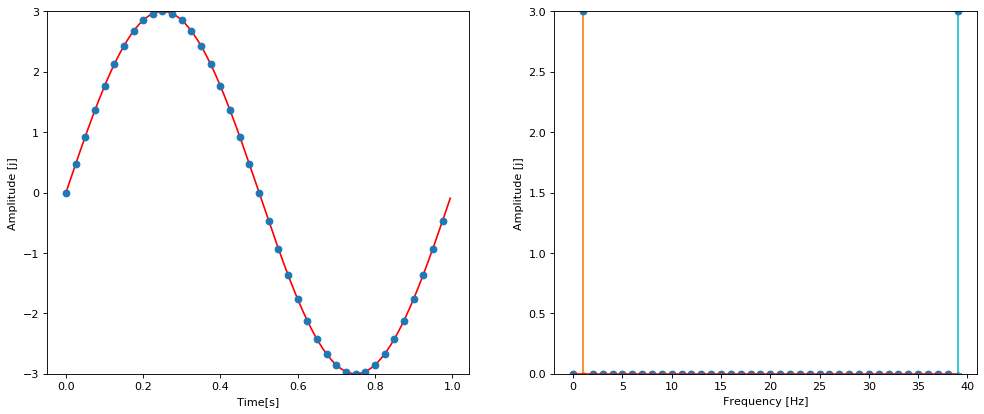

In [9]:
# f=1, A=3, LP=1
wykresy(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

Tym razem wartości na osi OY zwiększają się proporcjonalnie do częstotliwości próbkowania.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


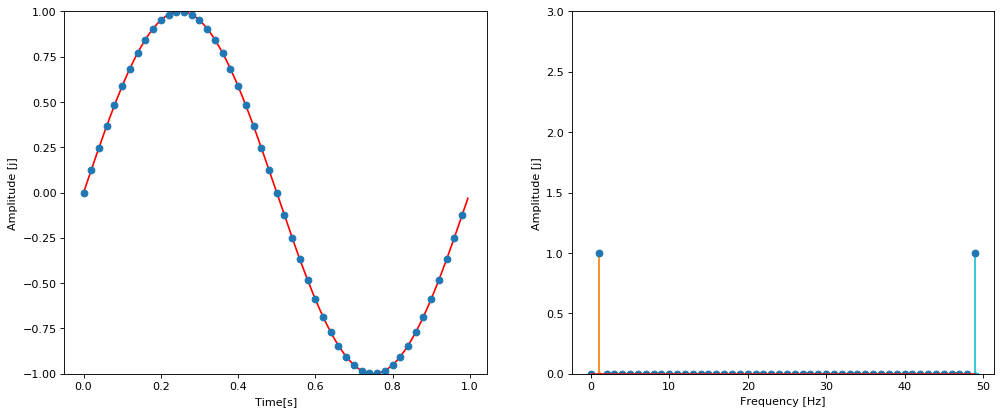

In [10]:
# f=1, w=50, LP=1
wykresy(f=1, w=50, LP=1)

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


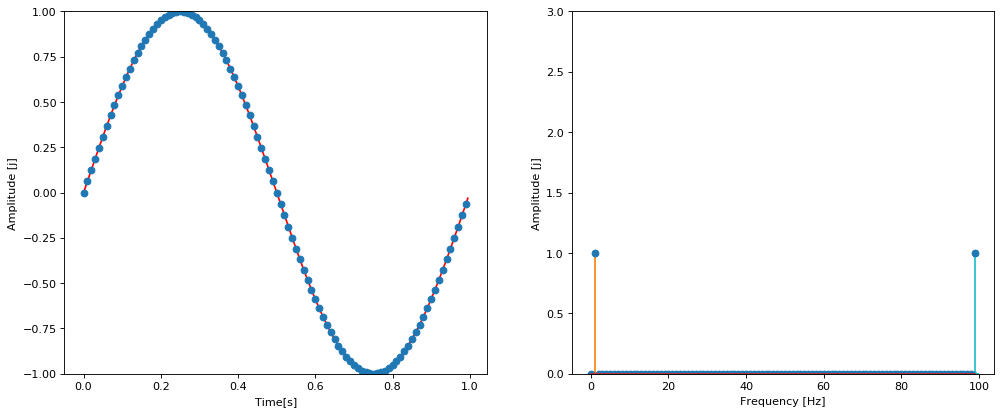

In [11]:
# f=1, w=100, LP=1
wykresy(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [12]:
# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


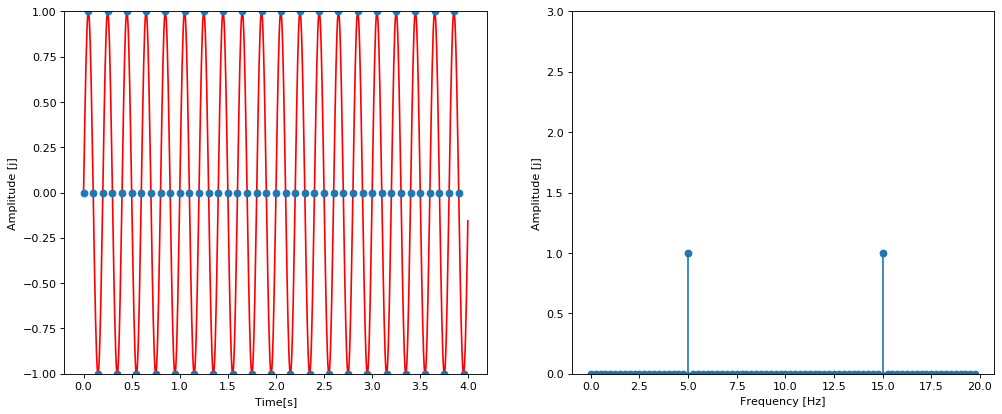

In [13]:
# f=5, w=20, LP=20
wykresy(f=5, w=20, LP=20)

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


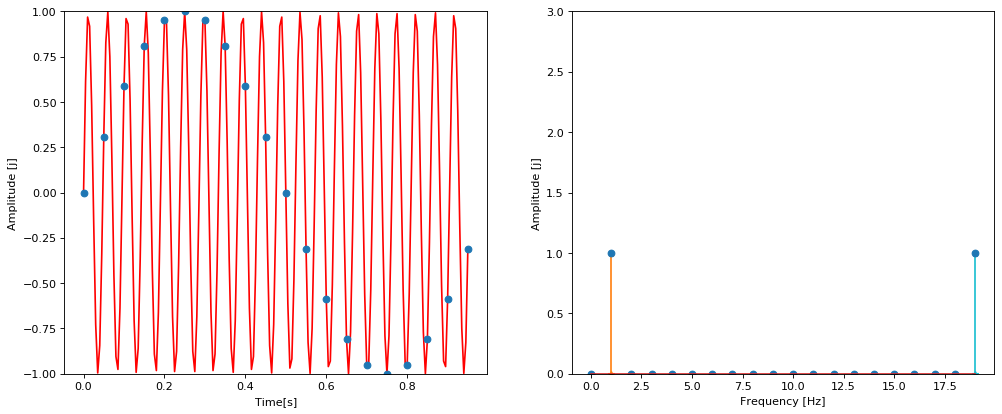

In [14]:
# f=21, w=20, LP=20
wykresy(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


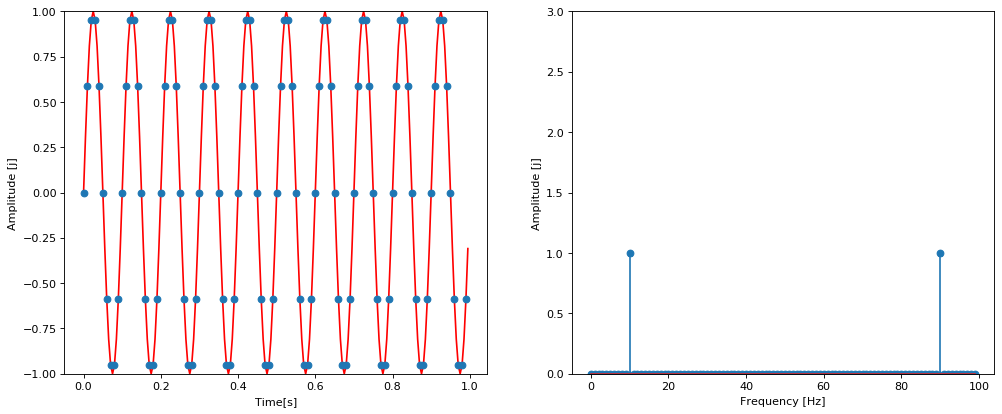

In [15]:
# f=10, w=100, A=1, LP=10
wykresy(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


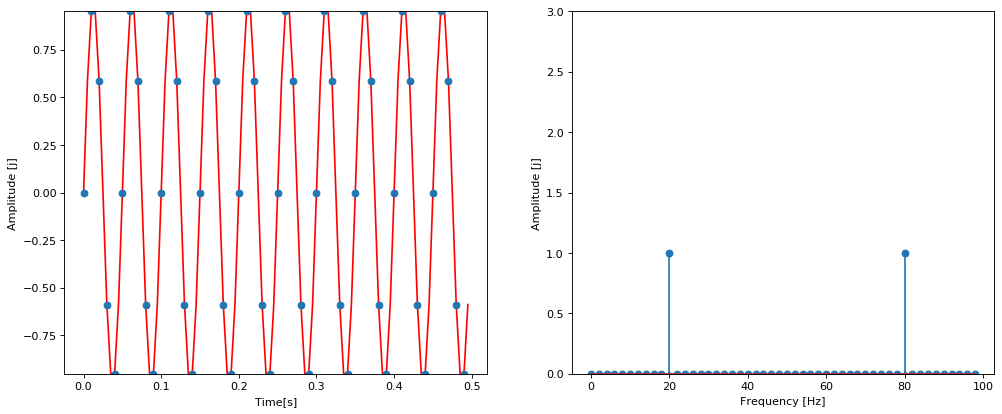

In [16]:
# f=20, w=100, A=1, LP=10
wykresy(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


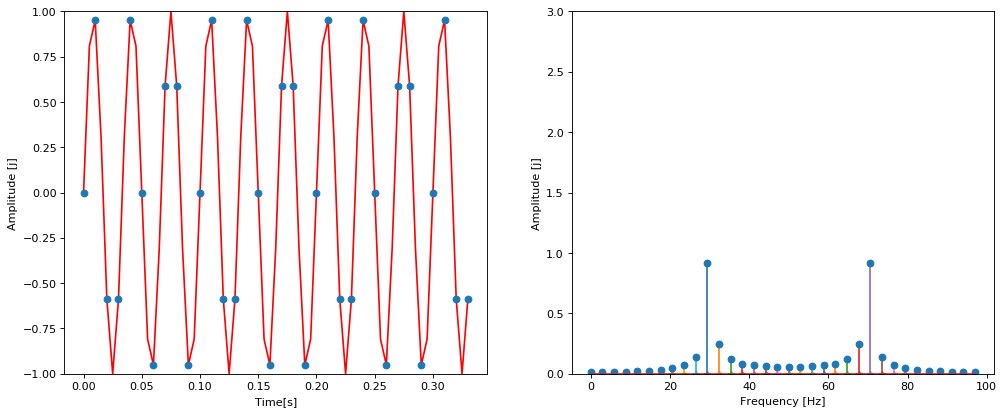

In [17]:
# f=30, w=100, A=1, LP=10
wykresy(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


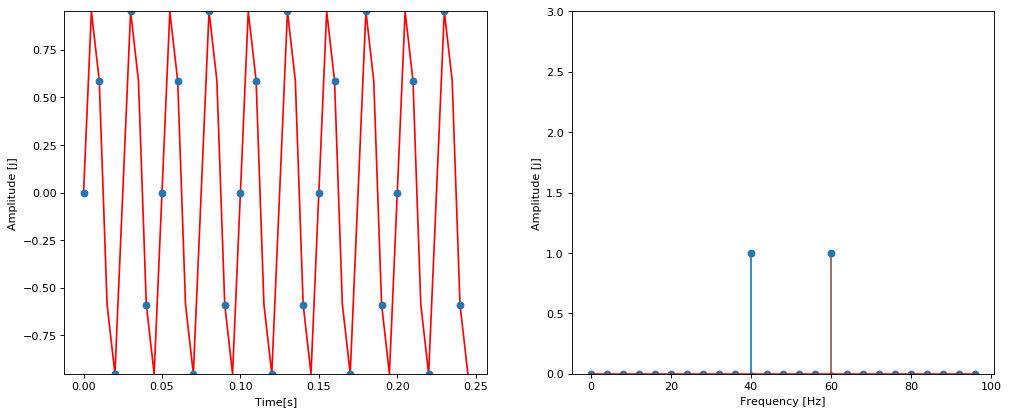

In [18]:
# f=40, w=100, A=1, LP=10
wykresy(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


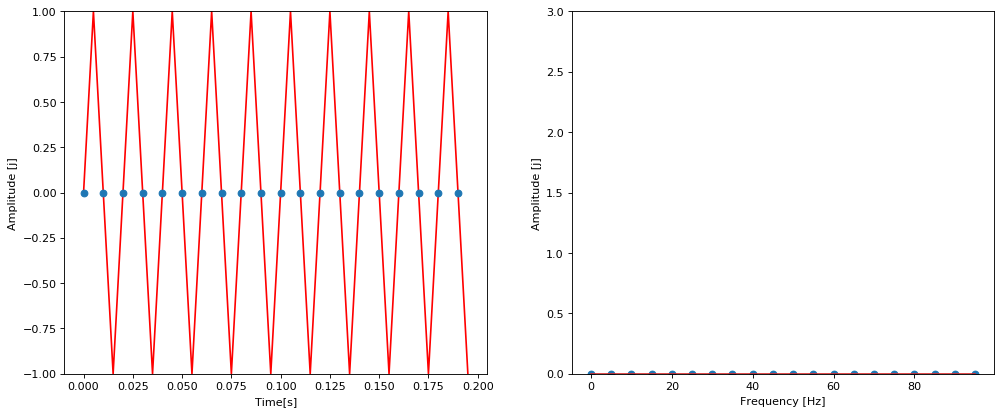

In [19]:
# f=50, w=100, A=1, LP=10
wykresy(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


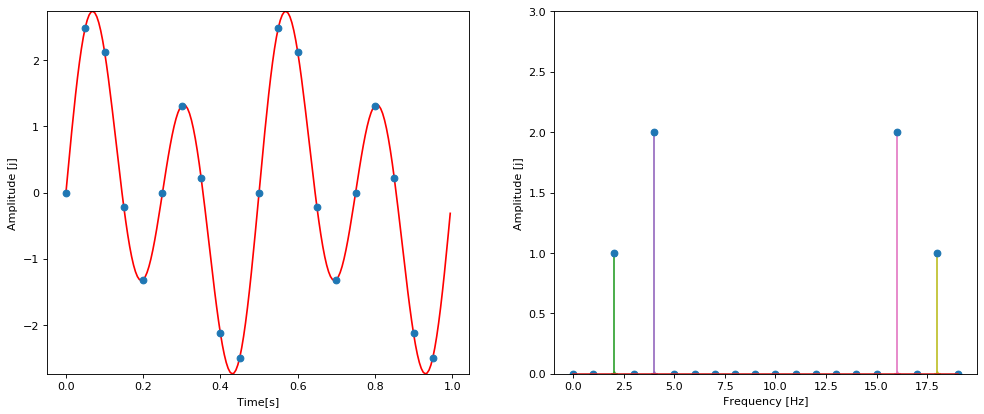

In [20]:
# Wyrysuj sygnał
wykresy(f=1, w=20, FUNC=lambda t : sin(2*pi*t*f) + 2*sin(4*pi*t*f))

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


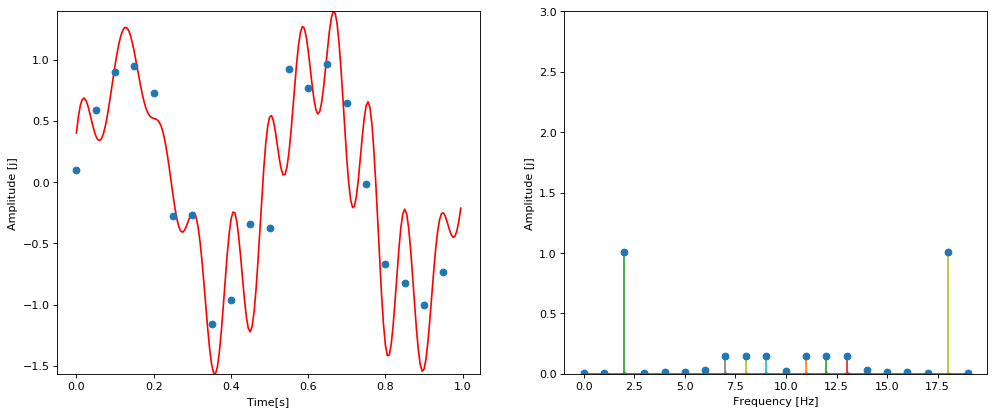

In [21]:
def z_szumem(t):
    res = sin(2*pi*t*f)
    for _ in range(100):
        szumA = np.random.uniform(0.02, 0.08) 
        szumf = np.random.uniform(5, 10)
        szumt = np.random.uniform(0, 2*pi)
        res += szumA * sin(2*pi*t*(f + szumf) + szumt)
    return res

wykresy(f=1, w=20, FUNC=z_szumem)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


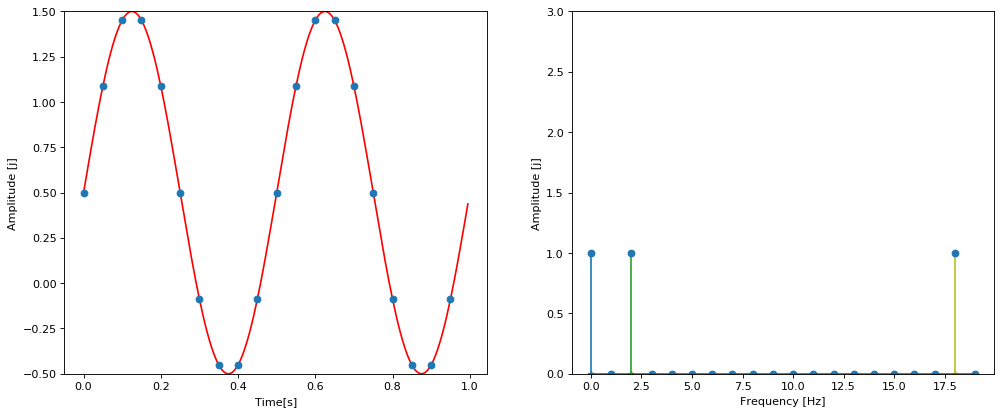

In [17]:
# Wyrysuj sygnał
wykresy(f=1, w=20, FUNC=lambda t: 0.5 + sin(2*pi*t*f))


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


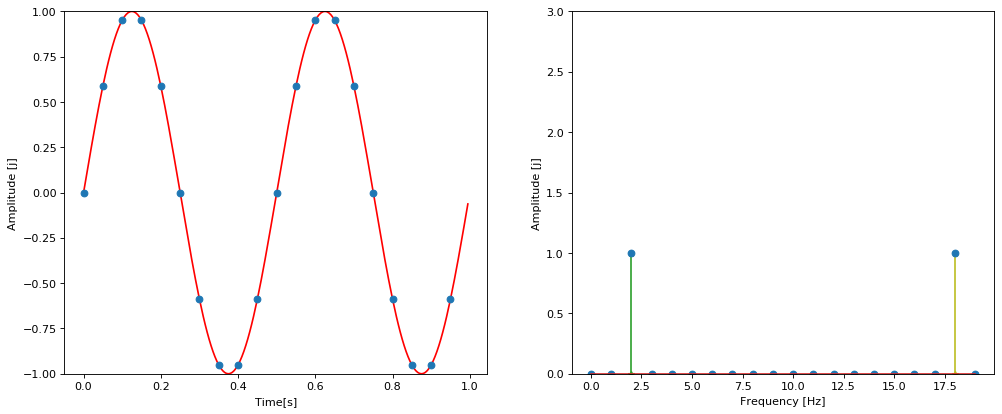

In [16]:
# faza = 0
wykresy(f=1, w=20, FUNC=lambda t: sin(2*pi*t*f))


/Users/mareksubocz/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


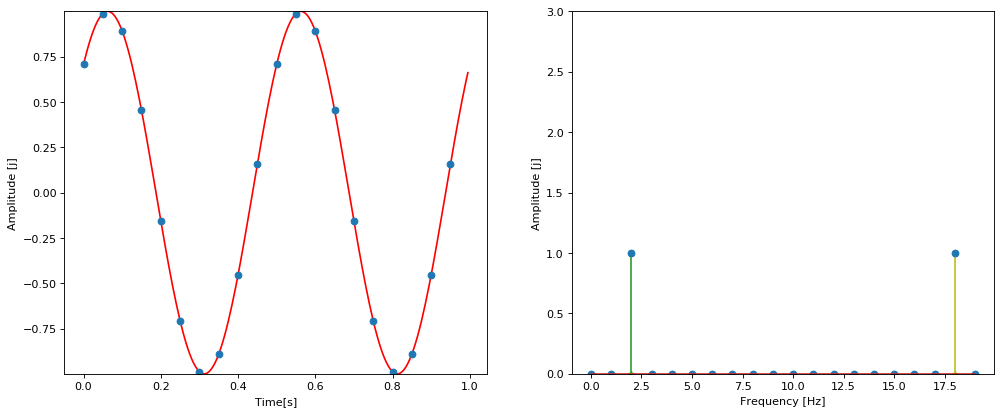

In [24]:
# faza = pi/4
wykresy(f=1, w=20, FUNC=lambda t: sin(2*pi*t*f + pi/4))


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [25]:
# wygeneruj wektor x
x=random.random(10)
print([round(abs(e), 4) for e in x])
print([round(abs(e), 4) for e in fft(ifft(x))])


[0.1635, 0.6109, 0.2524, 0.836, 0.6691, 0.5731, 0.8703, 0.7348, 0.1007, 0.4796]
[0.1635, 0.6109, 0.2524, 0.836, 0.6691, 0.5731, 0.8703, 0.7348, 0.1007, 0.4796]


In [26]:
# oblicz fft z x
res = fft(x)

In [27]:
# oblicz ifft
ires = ifft(res)

In [28]:
#porownaj x z ifft(fft(x)), wystarczy print

In [29]:
print(x)
print(ires)

[0.16350738 0.61086549 0.2523613  0.83600974 0.66909188 0.5731382
 0.87033937 0.73478903 0.10072675 0.47955535]
[0.16350738+2.77555756e-18j 0.61086549+3.05311332e-17j
 0.2523613 +3.19594968e-17j 0.83600974+1.79257061e-18j
 0.66909188+4.99961632e-17j 0.5731382 -3.86728264e-19j
 0.87033937-4.44450481e-17j 0.73478903-9.40506146e-18j
 0.10072675-2.64083817e-17j 0.47955535-3.64097019e-17j]
